In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
def transform(arr):
    arr = arr.reshape(4,1)
    tra = np.array([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]])
    arr = 0.5*(np.dot(tra,arr))
    return arr.reshape(2,2)

In [3]:
a = np.array([[1,2],[3,4]])
print(transform(a))

[[ 5. -1.]
 [-2.  0.]]


In [4]:
def encode():
    
    h = 320
    w = 360
    
    host_name = input("Enter the name of the host image: ")
    host = cv2.resize(imageio.imread(host_name),(w,h))/255.0
    host = host[:,:,:3]
    
    hiding_name = input("Enter the name of the hiding image: ")
    hiding = cv2.resize(imageio.imread(hiding_name),(w,h))/255.0
    hiding = hiding[:,:,:3]
    
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1)
    plt.title("Host image")
    ax1.imshow(host)

    ax2 = fig.add_subplot(1,2,2)
    plt.title("Hiding image")
    ax2.imshow(hiding)
    
    hidden= np.zeros((h,w,3))
    alpha= 1e-3
    
    for row in range(0,h,2):
        for column in range(0,w,2):
            for c in range(3):
                
                layer = host[row:row+2,column:column+2,c]
                layer = transform(layer)
                
                layer_h = hiding[row:row+2,column:column+2,c]
                
                temp = layer + (alpha*layer_h)
                hidden[row:row+2,column:column+2,c] = transform(temp)
                
    encoded_name = input("enter the name of the encoded image: ")
    imageio.imwrite(encoded_name,hidden)

In [5]:
def decode():
    
    h = 320
    w = 360
    alpha = 1e-3
    
    host_name = input("Enter the name of the host image: ")
    host = cv2.resize(imageio.imread(host_name),(w,h))/255.0
    host = host[:,:,:3]
    
    encoded_name = input("Enter the name of the encoded image: ")
    encoded = imageio.imread(encoded_name)
    encoded = encoded[:,:,:3]
    
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1)
    plt.title("Host image")
    ax1.imshow(host)
    
    decoded = np.zeros_like(encoded)
    decoded = encoded - host
    decoded = decoded/alpha
    
    for row in range(0,h,2):
        for column in range(0,w,2):
            for c in range(3):
                
                layer = decoded[row:row+2, column:column+2,c]
                temp = transform(layer)
                decoded[row:row+2, column:column+2,c] = temp
    
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1)
    plt.title("Decoded image")
    ax1.imshow(decoded)
    
    decoded_name = input("Enter a name for decoded image: ")
    imageio.imwrite(decoded_name,decoded)

What do you wish to do:
    1. Encode an image
    2. Decode an image
Enter your choice: 2
Enter the name of the host image: photo2.jpg
Enter the name of the encoded image: encoded.tiff


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Enter a name for decoded image: decoded.tiff


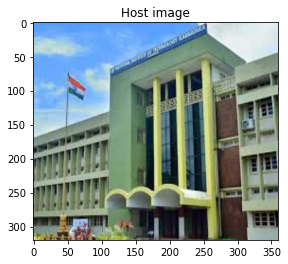

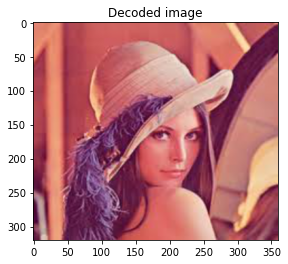

In [7]:
print("What do you wish to do:")
print("    1. Encode an image")
print("    2. Decode an image")
choice = input("Enter your choice: ")

if (choice == '1'):
    encode()
 
elif (choice=='2'):
    decode()

else:
    print("Please enter valid option")